### 전처리

In [ ]:
#1. 결측치 처리 : 삭제, 치환

In [1]:
import pandas as pd

In [2]:
# 데이터프레임 생성
data = {'Name': ['Alice', 'Bob', None],
'Age': [25, None, 30],
'Score': [85, 90, None]}
df = pd.DataFrame(data)
print(df)

    Name   Age  Score
0  Alice  25.0   85.0
1    Bob   NaN   90.0
2   None  30.0    NaN


In [4]:
print(df.isnull().sum())

Name     1
Age      1
Score    1
dtype: int64


In [6]:
# 결측치 제거
df_miss_row = df.dropna()
print(df_miss_row)

    Name   Age  Score
0  Alice  25.0   85.0


In [7]:
# 열 단위 삭제
df_miss_col = df.dropna(axis=1)
print(df_miss_col)

Empty DataFrame
Columns: []
Index: [0, 1, 2]


In [8]:
import pandas as pd
# 데이터프레임 생성
data = {'Name': ['Alice', 'Bob', None],
'Age': [25, None, 30],
'Score': [85, 90, None]}
df = pd.DataFrame(data)
print(df)


    Name   Age  Score
0  Alice  25.0   85.0
1    Bob   NaN   90.0
2   None  30.0    NaN


In [9]:
# 평균으로 결측치 대체
df['Age'] = df['Age'].fillna(df['Age'].mean())

#중간값으로 대체
df['Score'] = df['Score'].fillna(df['Score'].median())

# 최빈값으로 대체
df['Name'] = df['Name'].fillna(df['Name'].mode()[0])

In [10]:
print(df)

    Name   Age  Score
0  Alice  25.0   85.0
1    Bob  27.5   90.0
2  Alice  30.0   87.5


In [11]:
import numpy as np
import pandas as pd
# 예제 데이터
data = {'Scores': [70, 75, 80, 85, 90, 150, -50]}
df = pd.DataFrame(data)

print(df)

   Scores
0      70
1      75
2      80
3      85
4      90
5     150
6     -50


In [12]:
# IQR 계산
Q1 = df['Scores'].quantile(0.25) # 1사분위수
Q3 = df['Scores'].quantile(0.75) # 3사분위수
IQR = Q3 - Q1

In [16]:
# 이상치 기준
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)


50.0
110.0


In [14]:
# 이상치 확인
outliers = df[(df['Scores'] < lower_bound) | (df['Scores'] >
upper_bound)]
print(outliers)

   Scores
5     150
6     -50


In [15]:
# 이상치 제거
#df = df[(df['Scores'] >= lower_bound) & (df['Scores'] <=upper_bound)]
#이상치 변경
df.loc[df['Scores'] < lower_bound, 'Scores'] = lower_bound
df.loc[df['Scores'] > upper_bound, 'Scores'] = upper_bound
print(df)

   Scores
0      70
1      75
2      80
3      85
4      90
5     110
6      50


In [2]:
import pandas as pd
from scipy.stats import zscore

# 예제 데이터
data = {'Scores': [70, 75, 80, 85, 90, 1000000]}
df = pd.DataFrame(data)

# Z-Score 계산
df['Z_Score'] = zscore(df['Scores'])

# 이상치 확인
outliers = df[(df['Z_Score'] < -2) | (df['Z_Score'] > 2)]
print(outliers)

# 이상치 제거
#df = df[(df['Z_Score'] > -2) & (df['Z_Score'] < 2)]

# 이상치를 중간값으로 대체
median = df['Scores'].median()
df.loc[(df['Z_Score'] < -2) | (df['Z_Score'] > 2), 'Scores'] = median
print(df) 

    Scores   Z_Score
5  1000000  2.236068
   Scores   Z_Score
0    70.0 -0.447240
1    75.0 -0.447227
2    80.0 -0.447214
3    85.0 -0.447200
4    90.0 -0.447187
5    82.5  2.236068


C:\Users\user\AppData\Local\Temp\ipykernel_3876\464614432.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '82.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['Z_Score'] < -2) | (df['Z_Score'] > 2), 'Scores'] = median


   Original  Log Transformation  Square Root Transformation
0         1            0.693147                    1.000000
1         4            1.609438                    2.000000
2        16            2.833213                    4.000000
3        36            3.610918                    6.000000
4       100            4.615121                   10.000000
5      1000            6.908755                   31.622777
6     10000            9.210440                  100.000000


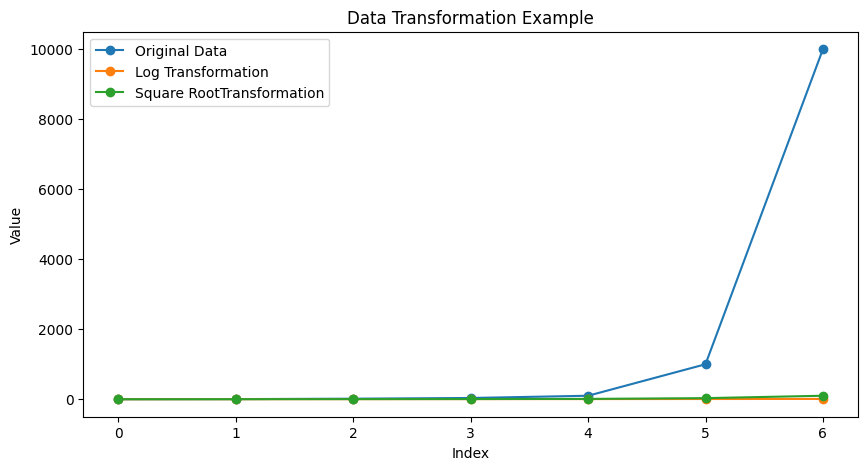

In [4]:
# 데이터 변환 예제
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 예제 데이터
data = pd.DataFrame({'Original': [1, 4, 16, 36, 100, 1000, 10000]})

# 로그 변환
data['Log Transformation'] = np.log1p(data['Original']) # log(x + 1)

# 스퀘어 루트 변환
data['Square Root Transformation'] = np.sqrt(data['Original'])

print(data)
                                                  
# 데이터 시각화
plt.figure(figsize=(10, 5))
plt.plot(data['Original'], label='Original Data', marker='o')
plt.plot(data['Log Transformation'], label='Log Transformation',
marker='o')
plt.plot(data['Square Root Transformation'], 
         label='Square RootTransformation', marker='o')
plt.legend()
plt.title('Data Transformation Example')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

   Original  Standardized  Normalized
0        50     -1.401826         0.0
1        80      0.215666         0.6
2        90      0.754829         0.8
3       100      1.293993         1.0
4        60     -0.862662         0.2


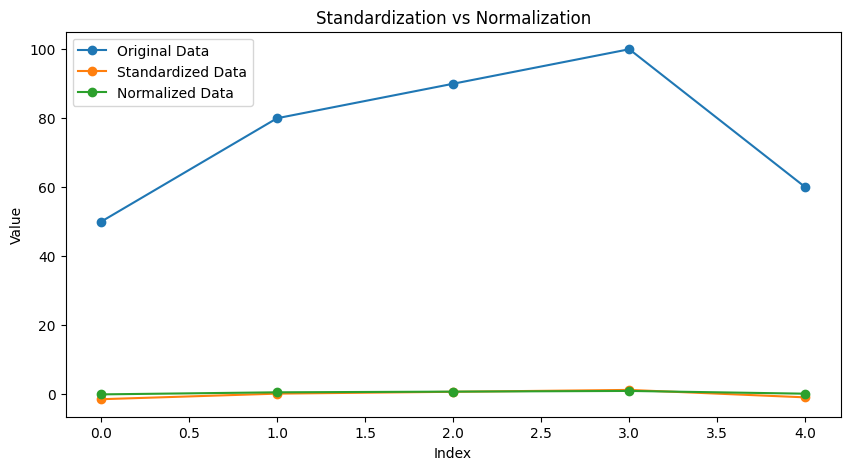

In [ ]:
# 데이터 스케일링(표준화, 정규화)

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# 데이터 생성
data = pd.DataFrame({'Original': [50, 80, 90, 100, 60]})

# 표준화
scaler_standard = StandardScaler()
data['Standardized'] = scaler_standard.fit_transform(data[['Original']])

# 정규화
scaler_minmax = MinMaxScaler()
data['Normalized'] = scaler_minmax.fit_transform(data[['Original']])

# 데이터 확인
print(data)

# 데이터 시각화
plt.figure(figsize=(10, 5))
plt.plot(data['Original'], label='Original Data', marker='o')
plt.plot(data['Standardized'], label='Standardized Data', marker='o')
plt.plot(data['Normalized'], label='Normalized Data', marker='o')
plt.legend()
plt.title('Standardization vs Normalization')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

In [2]:
# 범주형 데이터 처리 예제(레이블 인코딩, 원-핫 인코딩)

import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 데이터 생성
data = pd.DataFrame({'Fruits': ['사과', '배', '포도', '사과', '포도']})

# Step 1: 레이블 인코딩
label_encoder = LabelEncoder()
data['Label Encoding'] = label_encoder.fit_transform(data['Fruits'])

# Step 2: 원-핫 인코딩 (OneHotEncoder 사용, sparse_output=False로 개선)
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(data[['Label Encoding']])

# Step 3: 결과를 DataFrame으로 변환
one_hot_columns = one_hot_encoder.get_feature_names_out()
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# Step 4: 원래 데이터에 추가
data = pd.concat([data, one_hot_df], axis=1)

# 출력
print(data)

  Fruits  Label Encoding  Label Encoding_0  Label Encoding_1  Label Encoding_2
0     사과               1               0.0               1.0               0.0
1      배               0               1.0               0.0               0.0
2     포도               2               0.0               0.0               1.0
3     사과               1               0.0               1.0               0.0
4     포도               2               0.0               0.0               1.0
